In [130]:
n=10000
m=100
p=3 #Barabasi-Albert parameter
init_Theta=0.01 #0.06
N=100 #number of time steps
r=1 #0.3 #szansa aktywacji przy negatywnej korelacji
prob=0.20 #prawd. aktywności użytkownika w danej epidemii (do generaowania macierzy)
a=0.02 # parameter kształtu powr-law

In [131]:
%matplotlib inline

import matplotlib
import numpy as np
np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import networkx as nx
import scipy.sparse as sparse
import asizeof
G=nx.barabasi_albert_graph(n, p)
print('1.Undirected graph done!')
G=G.to_directed()
print('2.Directed graph done!')
for u,v in tqdm(G.edges()):
    G[u][v]['weight']=1.0#np.random.uniform(0,1)
print('3.Wieghts assigned!')
for i in tqdm(range(n)):
    in_degree=G.in_degree(i,weight='weight')
    for u,v in G.in_edges(i):
        #print(u,v,G[u][v]['weight'],G[u][v]['weight'] / in_degree, in_degree)
        G[u][v]['weight']/=in_degree
print('4.Wieghts normalized!')
W=nx.adjacency_matrix(G,weight='weight')
print('4.Adjacency (sparse) matrix created!')

1.Undirected graph done!
2.Directed graph done!


HBox(children=(IntProgress(value=0, max=59982), HTML(value='')))


3.Wieghts assigned!


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


4.Wieghts normalized!
4.Adjacency (sparse) matrix created!


In [132]:
C = np.random.random((m, m))
C=C*2-1
C *= np.tri(*C.shape,k=-1)
C=C+np.transpose(C)+np.eye(m)
print(C.min(),C.max(),C.mean(),np.median(C))

-0.99935432344 1.0 0.017621881058 0.0253369137813


In [133]:
C[23][45]

0.61068905277670815

In [134]:
# indykatory=[]
# frakcje=[]
# I=np.random.choice(a=[False,True], size=(n,m), replace=True, p=[1-prob, prob])
# I=I.reshape((1, n*m))
# I=np.random.permutation(I).reshape((n,m))
# indykatory.append(I)
# frakcje.append(np.vstack((range(m),np.sum(I,axis=0)/n)))
# I=I.copy()

In [135]:
indykatory=[]
frakcje=[]
import scipy.stats as stats
frac_inf=np.ceil(stats.powerlaw.rvs(a,size=(m))*n).astype(int)
I=np.full((n, m), False, dtype=bool)
for i in tqdm(range(m)):
    I[np.ix_(stats.randint.rvs(0, n-1, size=frac_inf[i]),[i])]=True
indykatory.append(I)
frakcje.append(np.vstack((range(m),np.sum(I,axis=0)/n)))
I=I.copy()

HBox(children=(IntProgress(value=0), HTML(value='')))

In [136]:
# frac_inf.mean()/n

In [137]:
# x = np.linspace(stats.powerlaw.ppf(0.01, a),
# ...                 stats.powerlaw.ppf(0.99, a), 100)
# plt.plot(x, stats.powerlaw.pdf(x, a),
# ...        'r-', lw=5, alpha=0.6, label='powerlaw pdf')
# plt.show()
# mean, var, skew, kurt = stats.powerlaw.stats(a, moments='mvsk')
# print(mean)

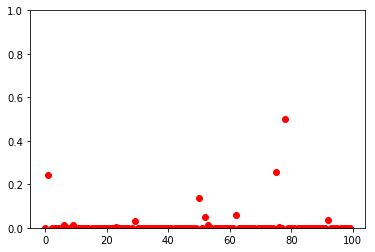

array([  1.00000000e-04,   2.41700000e-01,   3.00000000e-04,
         1.00000000e-04,   1.00000000e-04,   1.00000000e-04,
         1.23000000e-02,   1.00000000e-04,   1.00000000e-04,
         1.45000000e-02,   1.00000000e-04,   1.00000000e-04,
         1.00000000e-04,   1.00000000e-04,   1.00000000e-04,
         1.00000000e-04,   1.00000000e-04,   1.00000000e-04,
         1.00000000e-04,   1.00000000e-04,   1.00000000e-04,
         5.00000000e-04,   1.00000000e-04,   2.70000000e-03,
         1.00000000e-04,   1.00000000e-04,   1.00000000e-04,
         1.00000000e-04,   1.00000000e-04,   3.30000000e-02,
         1.00000000e-04,   1.00000000e-04,   1.00000000e-04,
         1.00000000e-04,   1.00000000e-04,   1.00000000e-04,
         1.00000000e-04,   1.00000000e-04,   1.00000000e-04,
         1.00000000e-04,   1.00000000e-04,   1.00000000e-04,
         1.00000000e-04,   1.00000000e-04,   1.00000000e-04,
         1.00000000e-04,   1.00000000e-04,   1.00000000e-04,
         1.00000000e-04,

In [138]:
plt.plot(frakcje[0][1], 'ro')
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()
frakcje[0][1]

In [139]:
#np.array_equal(I_int,I_prim)

In [140]:
#np.array_equal(np.where(np.greater_equal(W.transpose().dot(I_int).dot(C)/m,Theta)==True)[0],np.where(np.greater_equal(W.transpose().dot(I_prim).dot(C)/m,Theta)==True)[0])

In [141]:
Theta=np.full((n,m), init_Theta)

In [142]:
Y=np.full((n,1),0)

In [143]:
#F.max()
#F[np.ix_(list(range(0,7)),list(range(0, 7)))]
#F.mean()

In [144]:
I.shape

(10000, 100)

In [145]:
#U[np.ix_(np.nonzero(I[:,[23]] * I[:,[45]])[0],[23,45])]

In [146]:
I[np.ix_(np.nonzero(I[:,[23]] * I[:,[45]])[0],[23,45])]

array([], shape=(0, 2), dtype=bool)

In [147]:
cor_23_45=np.empty([0,2])
for l in tqdm(range(N)):    
    U=W.transpose().dot(I)
    #cor_23_45=np.concatenate((cor_23_45, U[np.ix_(np.nonzero(I[:,[23]] * I[:,[45]])[0],[23,45])]), axis=0)
    cor_23_45=np.concatenate((cor_23_45, U[:,[23,45]]), axis=0)
    F=U.dot(C)/m
    #print(F.min(),F.max(),F.mean(),l)
    temp=np.greater_equal(F, Theta) #porównanie funkcji aktywacji z progiem
    for i in np.unique(np.where(temp[:,:]==True)[0]): #interacja po użytkownikach, którzy mają przekroczony próg
        temp1=np.where(temp[i,:]==True)[0] #tagi, w których dla użytkownika i przekroczony był próg
        #print(i,temp1.shape,l)
        temp2=np.where(I[i][temp1]==True)[0] #tagi juz aktywne
        temp1=np.setdiff1d(temp1,temp2) #usuniecie juz aktywnych tagow
        # CZY NIE TRZEBA OSOBNO OBSLUZYC PUSTYCH temp1?
        if not np.any(C[temp1[:, None],temp1]<0): #sprawdzenie, czy kandydaci do aktywacji nie są negatywnie skorelowani
            I[i][temp1]=1 #aktywacja uzytkownika i w tagach z listy temp1
            Y[i]+=1 #zwiekszenie licznika aktywacji uzytkownika i
            Theta[i]=1-(1-init_Theta)**Y[i] #aktualizacja thety
        else:
            if np.random.rand()<r: #aktywacji pomimo negatywnej korelacji z pr. r
                I[i][temp1]=True
                Y[i]+=1
                Theta[i]=1-(1-init_Theta)**Y[i]
    indykatory.append(I)
    frakcje.append(np.vstack((range(m),np.sum(I,axis=0)/n)))
    I=I.copy()
del temp

HBox(children=(IntProgress(value=0), HTML(value='')))

-0.0244234573804 0.0236487287097 0.000416043510267 0
-0.0556297322168 0.0800114099601 0.00076151544489 1
-0.0768037766347 0.13076104348 0.00326732008567 2
-0.0928367433393 0.146758437765 0.0103215889199 3
-0.0977507253347 0.156335116773 0.0167250671599 4
-0.0986845515797 0.166955289872 0.0187997331968 5
-0.0966857504521 0.166930378615 0.0192835625209 6
-0.0966857504521 0.166930378615 0.0192901452478 7
-0.0966857504521 0.166930378615 0.0192901452478 8
-0.0966857504521 0.166930378615 0.0192901452478 9
-0.0966857504521 0.166930378615 0.0192901452478 10
-0.0966857504521 0.166930378615 0.0192901452478 11
-0.0966857504521 0.166930378615 0.0192901452478 12
-0.0966857504521 0.166930378615 0.0192901452478 13
-0.0966857504521 0.166930378615 0.0192901452478 14
-0.0966857504521 0.166930378615 0.0192901452478 15
-0.0966857504521 0.166930378615 0.0192901452478 16
-0.0966857504521 0.166930378615 0.0192901452478 17
-0.0966857504521 0.166930378615 0.0192901452478 18
-0.0966857504521 0.166930378615 0.01

In [148]:
#Y[np.ix_([0,3],[0,3])]
#plt.plot(frakcje[0][np.ix_([0,1],np.where(frakcje[0]>frakcje[1])[1])][0],frakcje[0][np.ix_([0,1],np.where(frakcje[0]>frakcje[1])[1])][1], 'go')

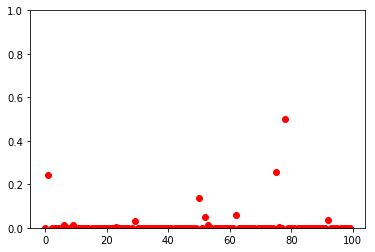

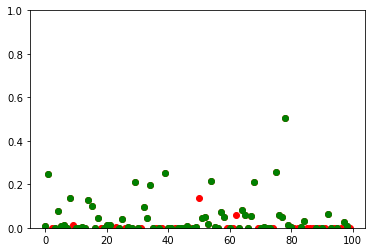

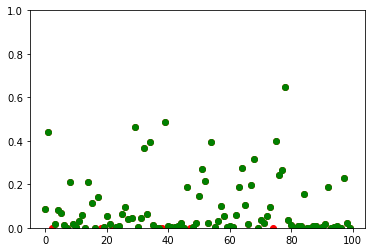

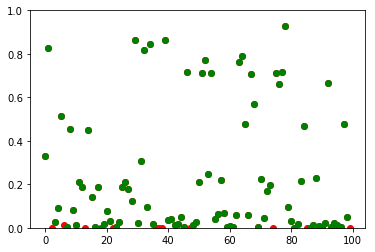

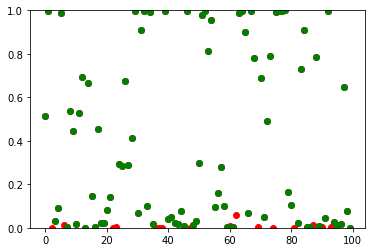

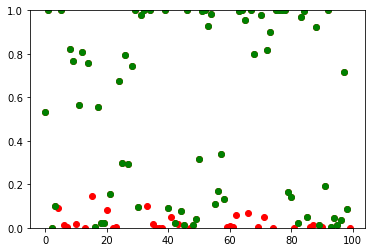

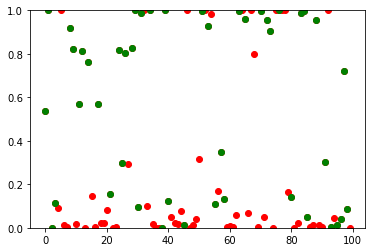

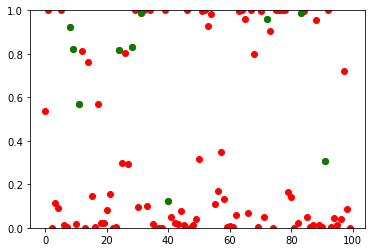

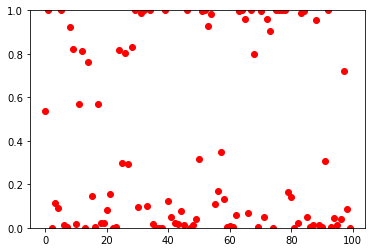

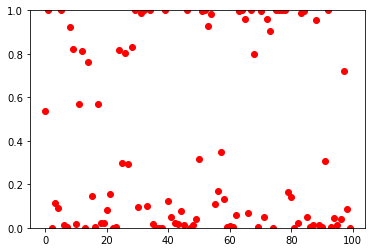

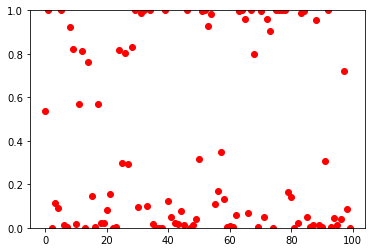

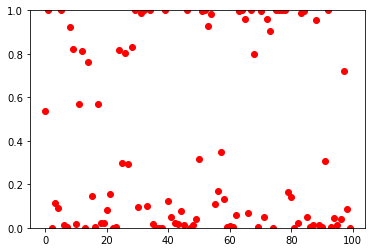

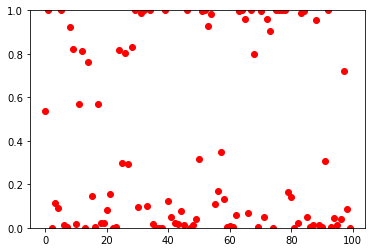

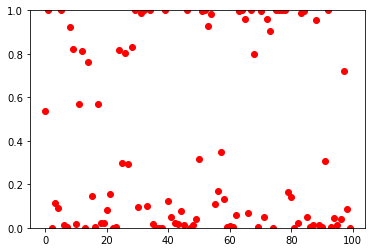

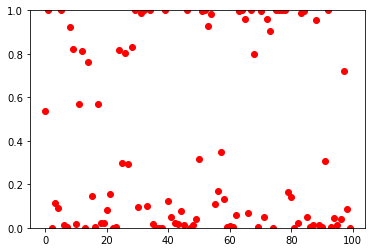

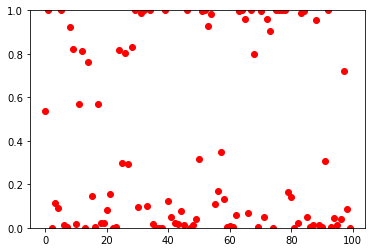

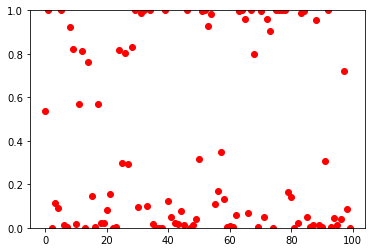

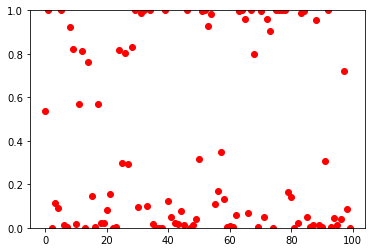

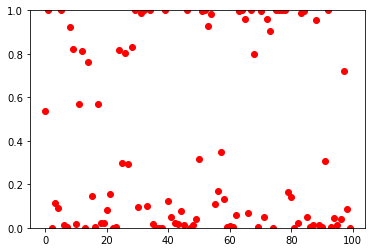

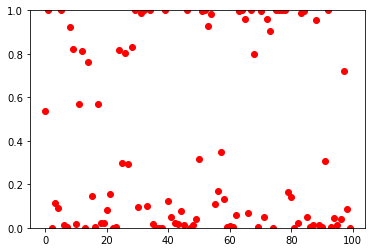

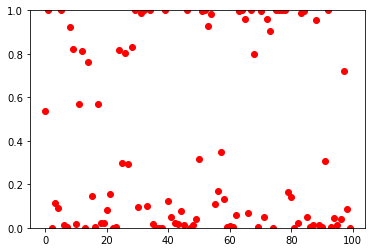

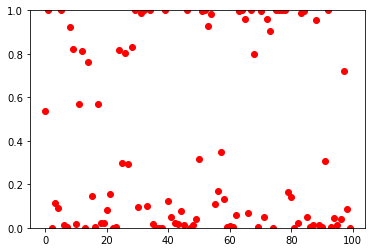

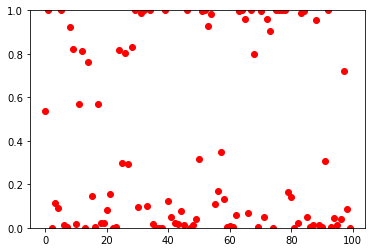

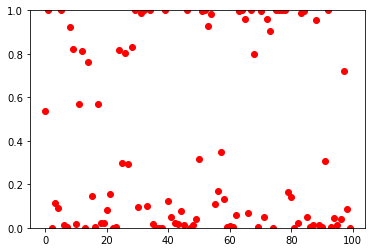

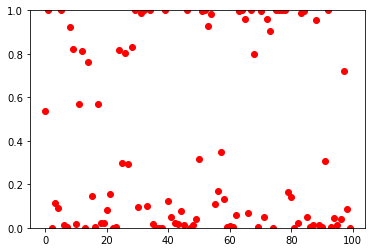

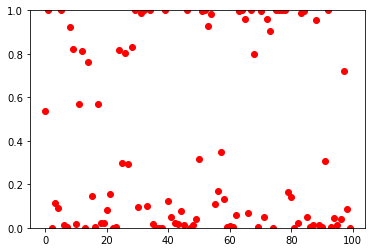

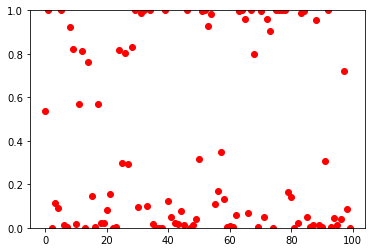

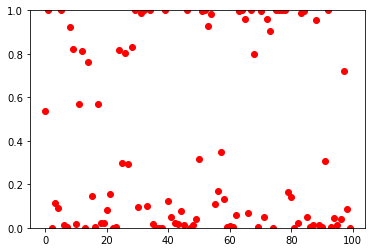

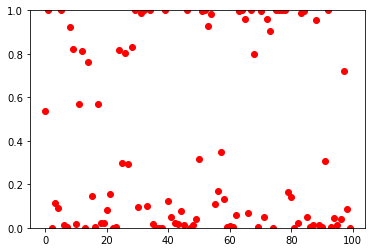

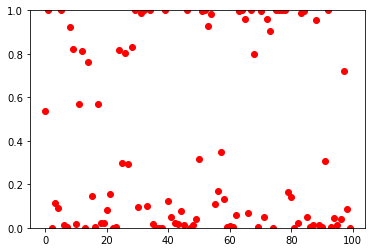

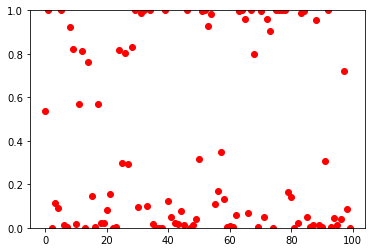

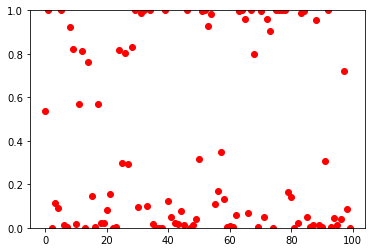

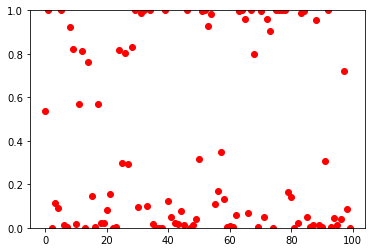

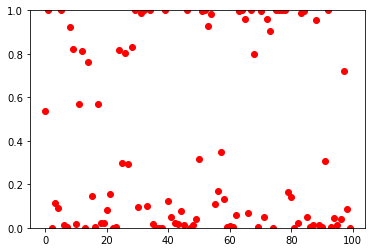

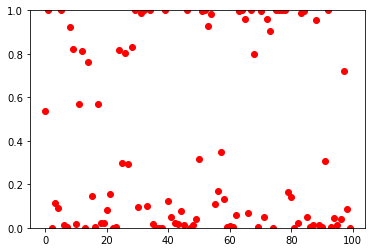

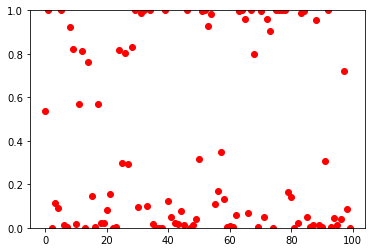

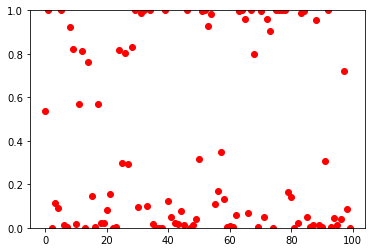

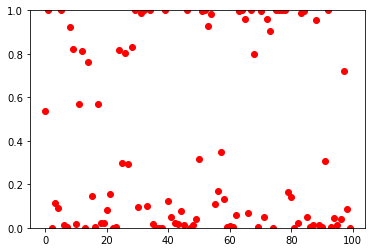

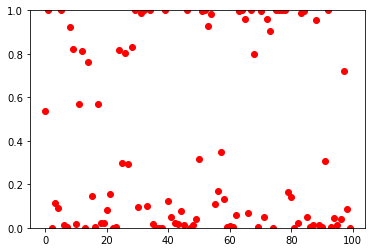

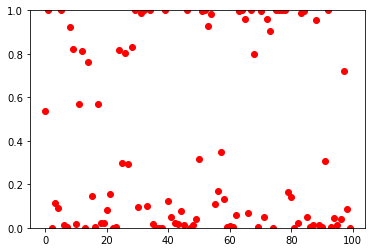

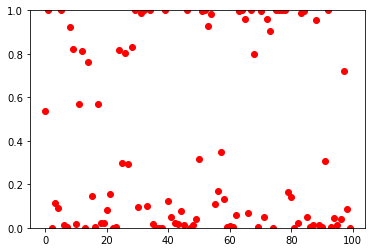

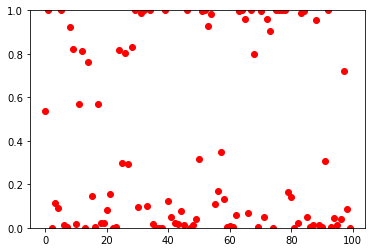

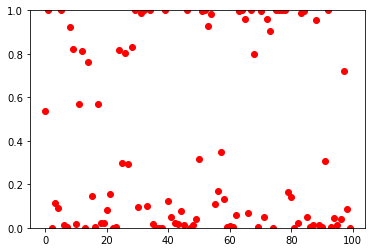

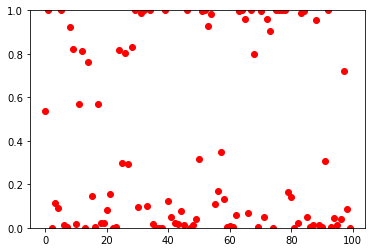

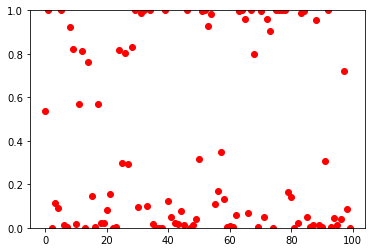

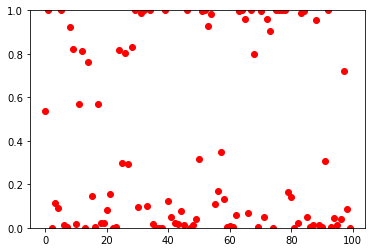

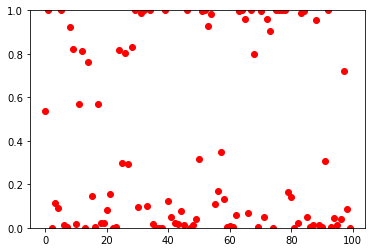

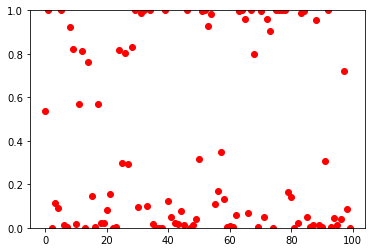

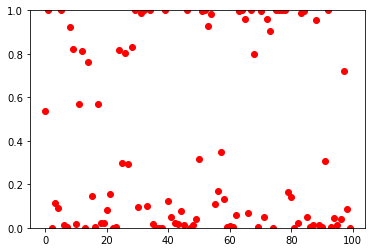

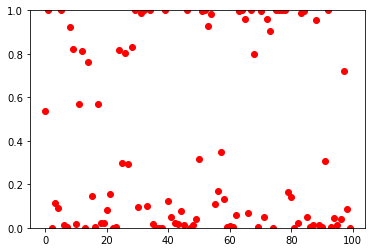

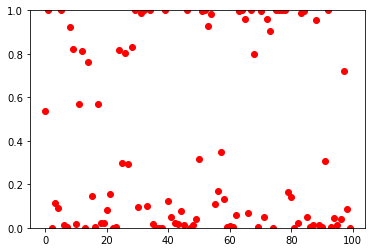

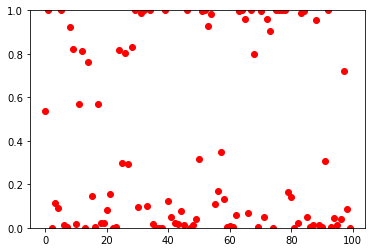

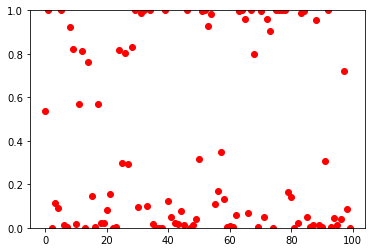

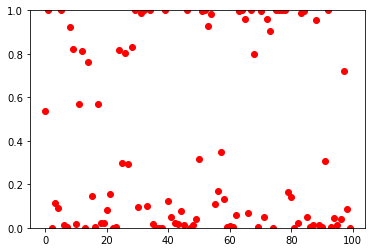

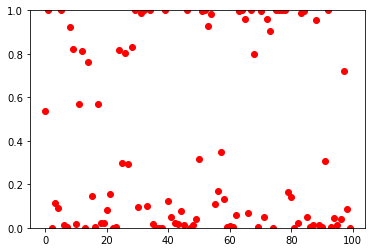

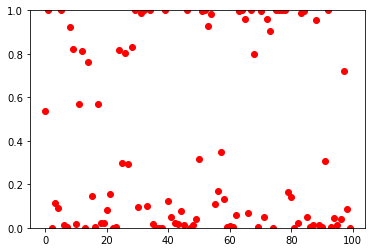

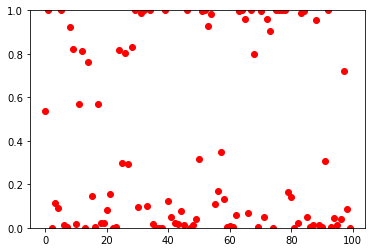

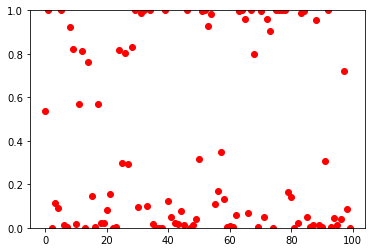

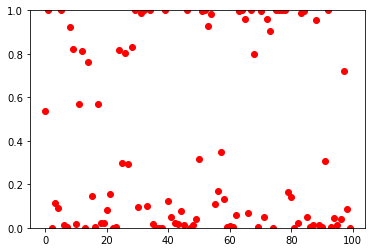

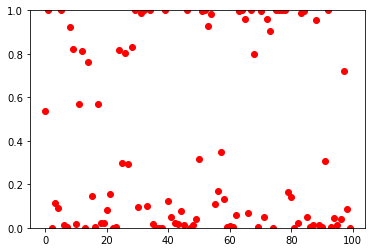

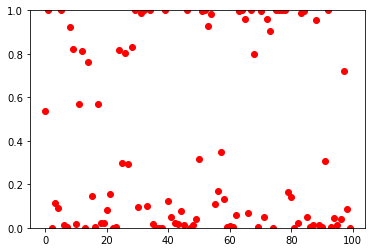

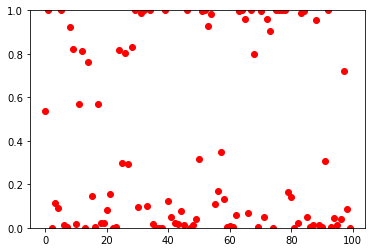

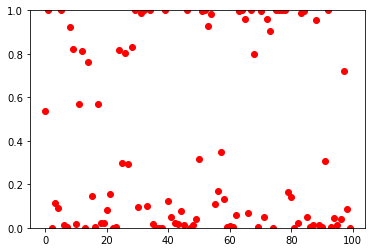

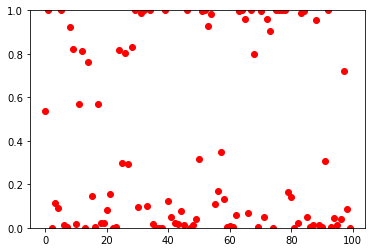

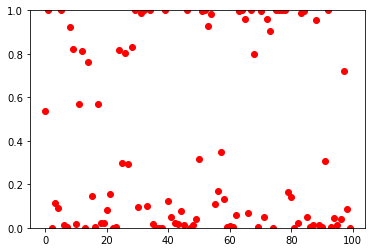

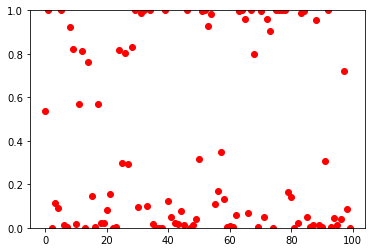

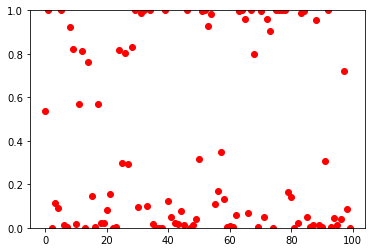

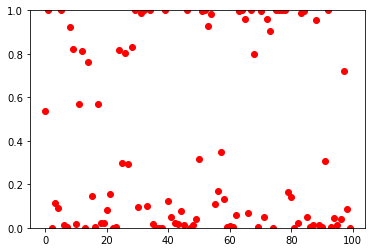

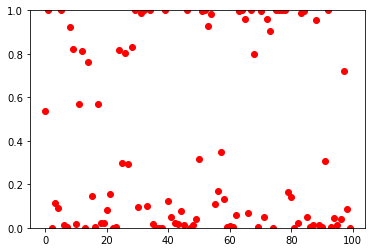

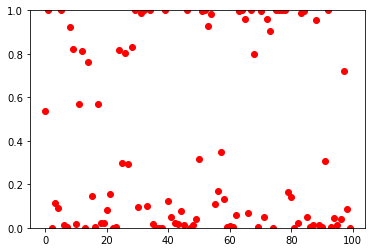

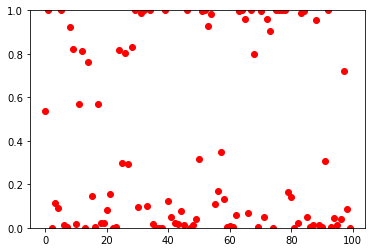

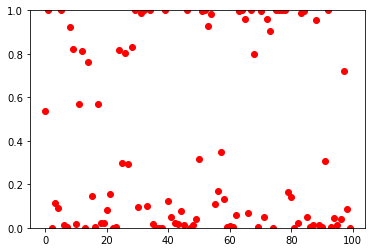

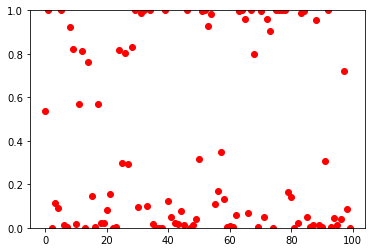

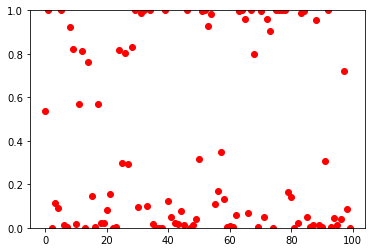

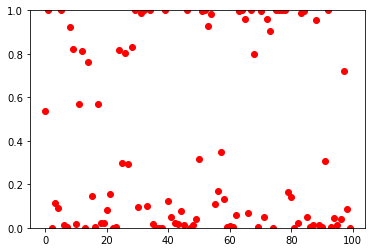

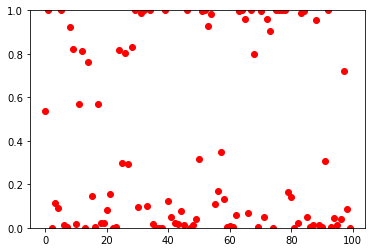

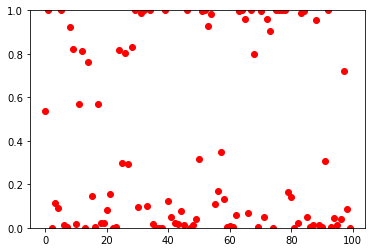

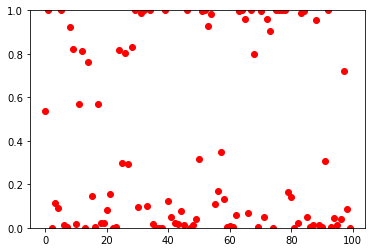

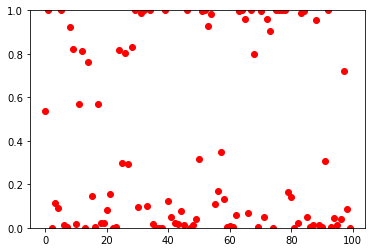

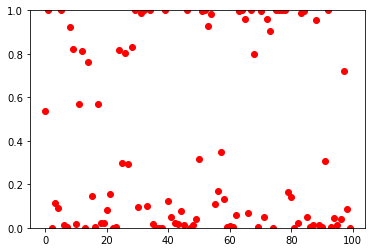

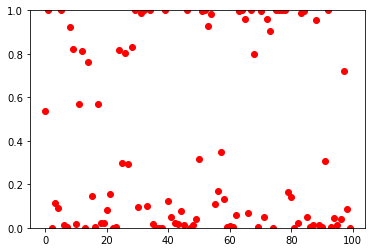

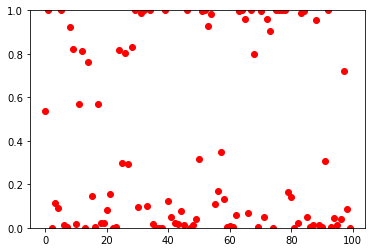

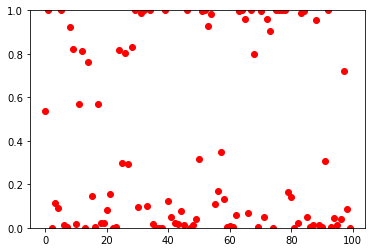

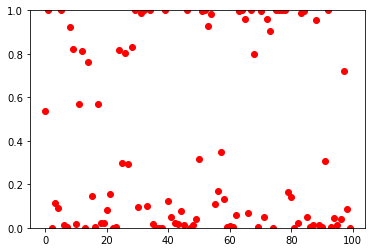

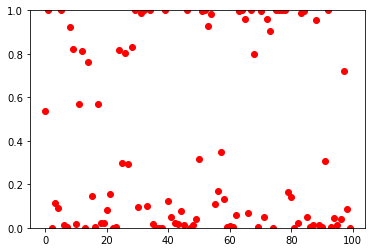

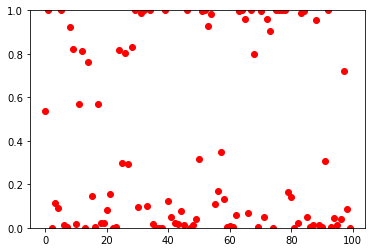

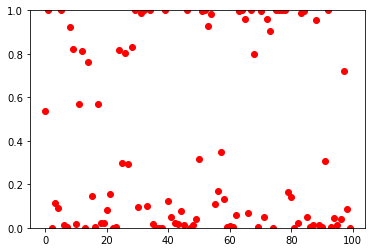

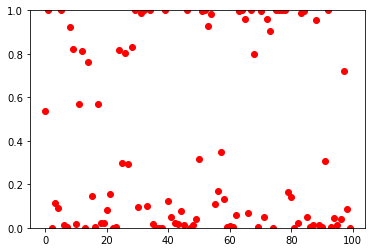

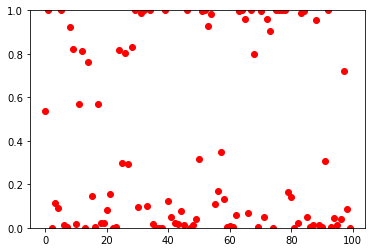

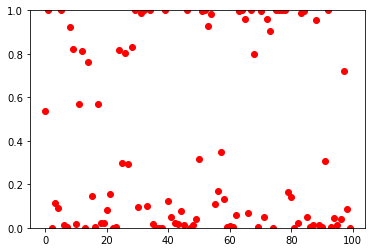

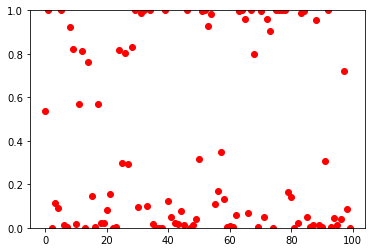

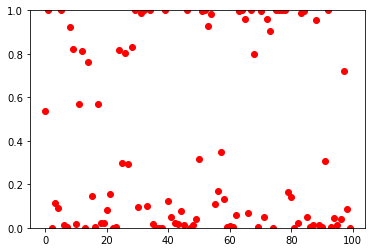

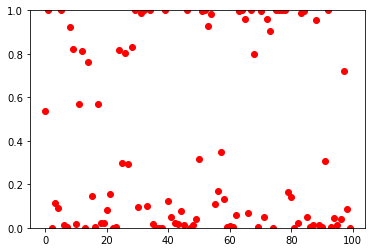

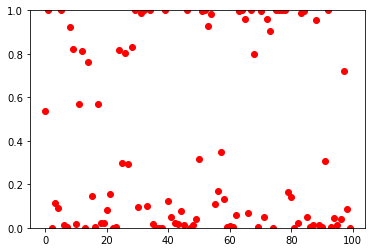

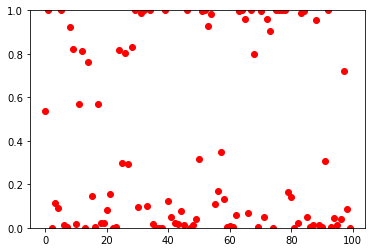

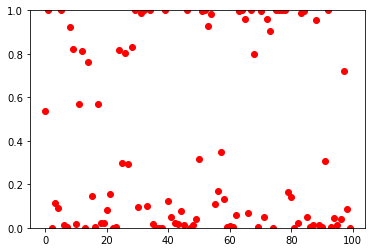

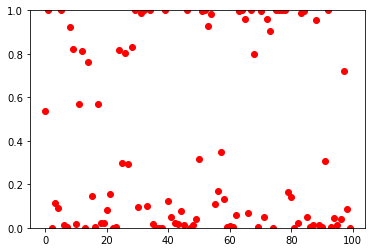

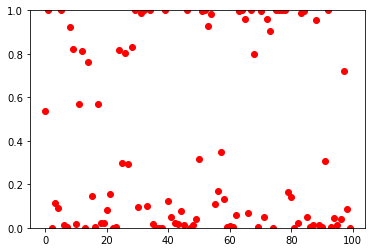

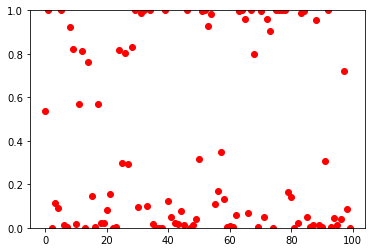

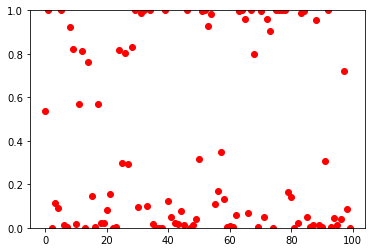

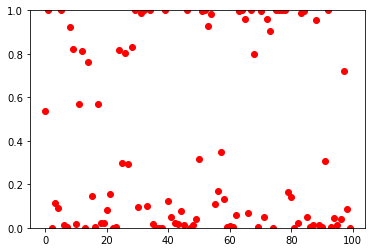

In [149]:
for i in range(N+1):
    plt.plot(frakcje[i][1], 'ro')
    axes = plt.gca()
    axes.set_ylim([0,1])
    if i>0:
        wzrost=frakcje[i][np.ix_([0,1],np.where(frakcje[i]>frakcje[i-1])[1])]
        plt.plot(wzrost[0],wzrost[1], 'go')
    plt.show()

In [157]:
for i in range(N):
    if np.array_equal(indykatory[i],indykatory[i+1])==True:
        print(i)

7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [151]:
asizeof.asizeof(indykatory)/1024/1024/1024

0.09407496452331543

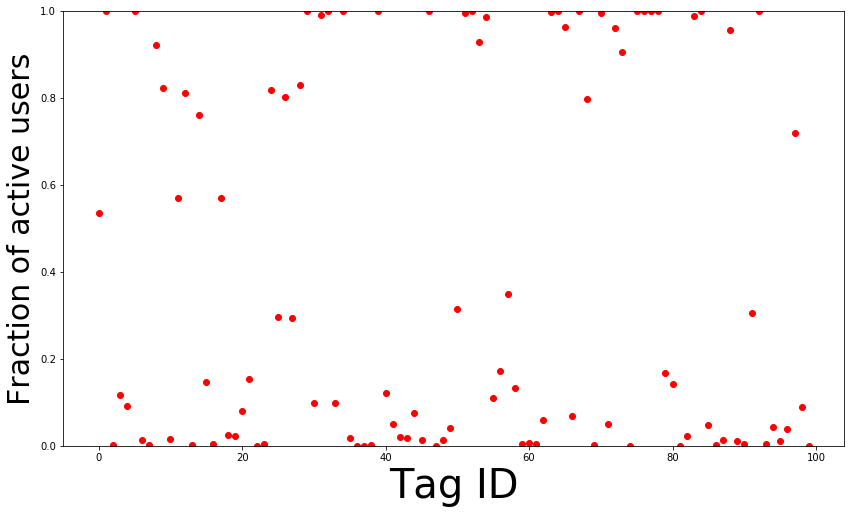

In [152]:
from matplotlib import animation, rc
from IPython.display import HTML

   # plt.plot(frakcje[i][1], 'ro')


fig, ax = plt.subplots()
ax.set_ylim([0,1])
fig.set_size_inches(14, 8, True)
ax.set_xlabel('Tag ID', fontsize=40)
ax.set_ylabel('Fraction of active users', fontsize=30)

x = np.arange(0,m)
line, = plt.plot(frakcje[0][1], 'ro')


def animate(i):
    line.set_ydata(frakcje[i][1])  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

anim = animation.FuncAnimation(fig, animate, np.arange(1, m), init_func=init,
                              interval=70, blit=True)

#dpi = 300
#writer = animation.writers['ffmpeg'](fps=30)
#anim.save('power_law.mp4',writer=writer,dpi=dpi)

HTML(anim.to_html5_video())

In [153]:
np.corrcoef(cor_23_45, rowvar=False)

array([[ 1.        , -0.00527645],
       [-0.00527645,  1.        ]])

In [154]:
cor_23_45.shape

(1000000, 2)

In [155]:
np.corrcoef(cor_23_45.reshape((n,2*N))[:,[2,3]], rowvar=False)

array([[ 1.        , -0.02579039],
       [-0.02579039,  1.        ]])

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


0.61068905277670815

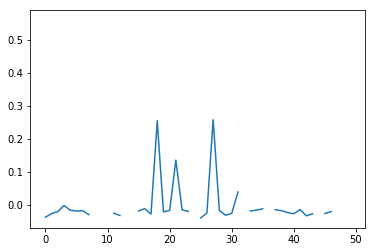

In [156]:
tmp=[]
for i in range(int(N/2)):
    tmp.append(np.corrcoef(cor_23_45.reshape((n,2*N))[:,[2*i,2*i+1]], rowvar=False)[0][1])
plt.plot(tmp)
C[23][45]